<a href="https://colab.research.google.com/github/akilash-gaddam/NLP/blob/main/NLP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Import the pandas library for data manipulation
import numpy as np # Import the numpy library for numerical operations
import spacy # Import the spacy library for natural language processing
import re # Import the re module for regular expressions
import seaborn as sns
import matplotlib.pyplot as plt
from collections import counter


df=pd.read_csv('Tweets.csv') # Read the 'Tweets.csv' file into a pandas DataFrame
print(df.head()) # Print the first 5 rows of the DataFrame to display its structure and data

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [ ]:
df=df[['text','airline_sentiment_gold']].dropna() # Select 'text' and 'airline_sentiment_gold' columns and drop rows with any missing values
print(df) # Print the DataFrame after dropping nulls

                                                    text  \
1286   @united I'm aware of the flight details, thank...   
2017   @united flighted delayed for hours. 10pm arriv...   
2135                           @united I have a question   
2201   @united it's been over 3 hours...at what point...   
2383   @united You shouldn't page o'head that it's be...   
3005   @united couldn't have possibly messed up our t...   
3149   @united rebooked 24 hours after original fligh...   
4206   @united So what do you offer now that my fligh...   
4525   @SouthwestAir What an awesome flight Dallas 2 ...   
5183   @SouthwestAir  also, gave up after 1 hr 32 min...   
5341   @SouthwestAir I've been on hold for over an ho...   
5749   @SouthwestAir If a travel advisory is posted f...   
5810   @SouthwestAir please do something about the sp...   
6530   @SouthwestAir I never got a Cancelled Flightla...   
6632   @SouthwestAir please send me a number to call ...   
6728   @southwestair - kind of early but

In [ ]:
def clean(text):
  text=re.sub(r"http\S+|www", "", text) # Remove URLs (http, https, www)
  text=re.sub(r'@\w+',"",text) # Remove mentions (e.g., @username)
  text=re.sub(r'[^A-Za-z0-9# ]', "", text) # Remove any characters that are not alphanumeric, a hashtag (#), or a space
  return text.strip() # Remove leading/trailing whitespace from the cleaned text

df["clean-text"]=df["text"].apply(clean) # Apply the 'clean' function to the 'text' column and store the result in a new 'clean-text' column
print(df.head()) # Print the first 5 rows of the DataFrame to show the new 'clean-text' column

                                                   text  \
1286  @united I'm aware of the flight details, thank...   
2017  @united flighted delayed for hours. 10pm arriv...   
2135                          @united I have a question   
2201  @united it's been over 3 hours...at what point...   
2383  @united You shouldn't page o'head that it's be...   

     airline_sentiment_gold                                         clean-text  
1286               negative  ImawareoftheflightdetailsthanksThreehoursLateF...  
2017               negative  flighteddelayedforhours10pmarrivaltoVegasisnow...  
2135                neutral                                     Ihaveaquestion  
2201               negative  itsbeenover3hoursatwhatpointdoyouletpeopleoffo...  
2383               negative  Youshouldntpageoheadthatitsbesttocall1800#onho...  


In [ ]:
corpus = df["clean-text"].tolist() # Create a list called 'corpus' containing the cleaned text from the 'clean-text' column of the DataFrame
print(corpus) # Print the created corpus list

["@united I'm aware of the flight details, thanks. Three hours Late Flight a crew that could not give less of a shit", '@united flighted delayed for hours. 10pm arrival to Vegas is now 4am. Did you seriously lose my luggage???', '@united I have a question', "@united it's been over 3 hours...at what point do you let people off of the plane? @FoxNews @CNN @msnbc", "@united You shouldn't page o'head that it's best to call 1-800# - on hold 26+ mins", "@united couldn't have possibly messed up our trip anymore than they did. Thanks for being such a terrible airline. #disappointed", '@united rebooked 24 hours after original flight, to say your handling of situation was bad would be an understatement.', "@united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?", "@SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child's peanut allergy but u guys didn't. Thanks! 👍😊", '@SouthwestAir  also, gave up after 1 hr 

In [ ]:
from spacy.lang.en import English # Import English language model for spaCy
from spacy import Language # Import Language class from spaCy for custom components

nlp = spacy.load("en_core_web_sm") # Load the small English language model for spaCy

def hashtag_component(doc):
  # Iterate through tokens in the document and collect text of tokens that start with '#'
  doc._.hashtags=[token.text for token in doc if token.text.startswith('#')]
  return doc # Return the modified document

spacy.tokens.Doc.set_extension("hashtags", default=[], force=True) # Add a custom extension 'hashtags' to spaCy's Doc objects, initialized as an empty list
nlp.add_pipe("hashtag_component",last=True) # Add the custom 'hashtag_component' to the spaCy processing pipeline, placing it at the end

<function __main__.hashtag_component(doc)>

In [ ]:
docs = list(nlp.pipe(corpus)) # Process the 'corpus' list using the spaCy pipeline and convert the generator to a list of Doc objects
print(docs) # Print the list of spaCy Doc objects

[@united I'm aware of the flight details, thanks. Three hours Late Flight a crew that could not give less of a shit, @united flighted delayed for hours. 10pm arrival to Vegas is now 4am. Did you seriously lose my luggage???, @united I have a question, @united it's been over 3 hours...at what point do you let people off of the plane? @FoxNews @CNN @msnbc, @united You shouldn't page o'head that it's best to call 1-800# - on hold 26+ mins, @united couldn't have possibly messed up our trip anymore than they did. Thanks for being such a terrible airline. #disappointed, @united rebooked 24 hours after original flight, to say your handling of situation was bad would be an understatement., @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?, @SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child's peanut allergy but u guys didn't. Thanks! 👍😊, @SouthwestAir  also, gave up after 1 hr 32 minutes on hold.

In [ ]:
from collections import Counter # Import the Counter class for counting hashable objects

all_hashtags = [] # Initialize an empty list to store all extracted hashtags
for doc in docs:
    all_hashtags.extend(doc._.hashtags) # Extend the list with hashtags found in each processed spaCy Doc object

hashtag_freq = Counter(all_hashtags) # Create a Counter object to count the frequency of each hashtag
print(all_hashtags) # Print the list of all collected hashtags

['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']


/tmp/ipython-input-3192007920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(hashtags), y=list(counts), palette="viridis")


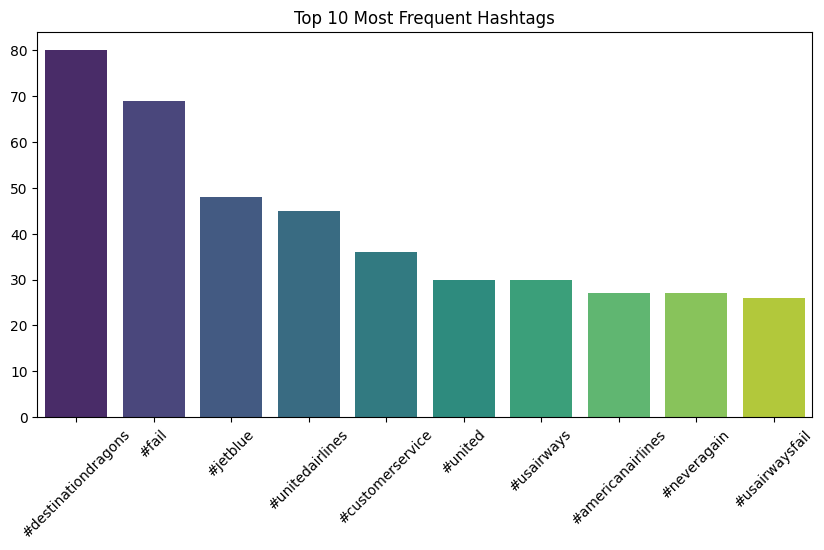

/tmp/ipython-input-3192007920.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette="magma")


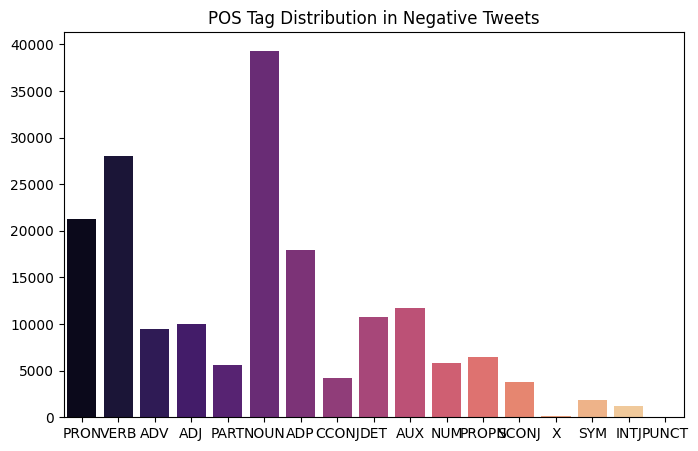

In [60]:
# Step 11: Visualize top 10 hashtags
top_hashtags = hashtag_freq.most_common(10)

if top_hashtags: # Check if any hashtags were found
    hashtags, counts = zip(*top_hashtags)

    plt.figure(figsize=(10,5))
    sns.barplot(x=list(hashtags), y=list(counts), palette="viridis")
    plt.title("Top 10 Most Frequent Hashtags")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No hashtags found in the provided data.") # Print a message if no hashtags were found to plot

# Step 12: Filter negative tweets and visualize POS distribution
negative_docs = [docs[i] for i in range(len(docs)) if df['airline_sentiment'].iloc[i] == 'negative']

pos_counts = Counter([token.pos_ for doc in negative_docs for token in doc])

plt.figure(figsize=(8,5))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette="magma")
plt.title("POS Tag Distribution in Negative Tweets")
plt.show()